# SOAP parameter search: 
## analysis of VLDNat structure with different params

In [190]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [191]:
from ase.io.extxyz import read_xyz
import numpy as np
from ase.atoms import Atoms
from ase.io.formats import index2range
from ase.io.cfg import read_cfg
from io import StringIO, UnsupportedOperation
from mtp import *
import os
from matplotlib import pyplot as plt
from quippy.potential import Potential
import pickle
from Ge_analysis import *
from Ge_calculation import *
import matplotlib.pyplot as plt
from matscipy.rings import ring_statistics
from datetime import datetime
import pymatgen.ext.matproj as mp
import pymatgen.io.ase as pase
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from numpy.random import normal
from ase.io.extxyz import write_xyz
from ase.io.lammpsdata import write_lammps_data
import re
import matplotlib as mpl

In [193]:
mpl.style.reload_library()
mpl.style.use('VLD')

In [5]:
GAP_18_dir = '/u/vld/hert5155/jup_remote/Ge_od/Si_GAP_training/libAtoms-silicon-testing-framework-fc252cb/models/GAP'
os.chdir('/u/vld/hert5155/jup_remote/Ge_od/GAP_to_MTP/pressure_quench/pressure_quench_labelling/SOAP_parameter_search')
GAP_18_pot = Potential(param_filename=GAP_18_dir+'/gp_iter6_sparse9k.xml', calc_args='local_gap_variance')

## Sigma

In [40]:
vld100k_sig = pd.read_json('VLDNat_sig.json')

In [41]:
rough_pressures = np.linspace(0,20,len(vld100k_sig))*1e4
vld100k_sig.insert(0, 'f_PressAve', rough_pressures)

In [181]:
xtals = ['fcc', 'dia', 'bSn', 'sh']

In [197]:
sig_labels = [[i for i in vld100k_sig.columns if j in i and 'fix' not in i][1:-1] for j in xtals]
fcc_labels = [i for i in vld100k_sig.columns if 'fcc' in i and 'fix' not in i][1:-1]
dia_labels = [i for i in vld100k_sig.columns if 'dia' in i and 'fix' not in i][1:-1]
sh_labels = [i for i in vld100k_sig.columns if 'sh' in i and 'fix' not in i][1:-1]
bSn_labels = [i for i in vld100k_sig.columns if 'bSn' in i and 'fix' not in i][1:-1]

In [131]:
cmap = plt.cm.Purples_r

[Text(0, 0.5, 'SOAP similarity')]

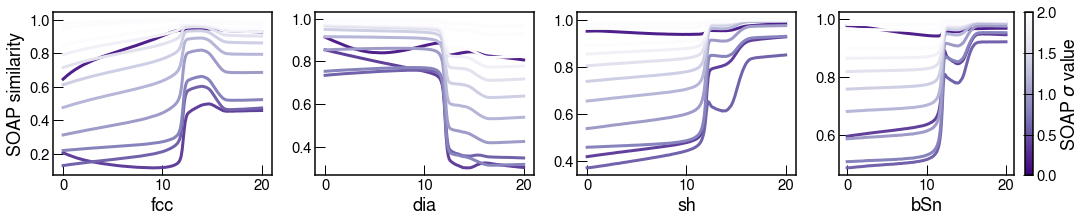

In [133]:
df = vld100k_sig
labels = [fcc_labels, dia_labels, sh_labels, bSn_labels]

sigma_range = [[float(re.findall("\d+\.\d+", i)[0]) for i in j] for j in labels]
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=max(flatten(sigma_range))))

cols = 4
rows = int(np.ceil(len(labels)/cols))

fig, ax = plt.subplots(rows,cols, figsize=(4.5*cols,3*rows))
for j in range(len(labels)):
    col = cmap(sigma_range[j])
    for ct, i in enumerate(labels[j]):
        ax[j].plot(df['f_PressAve']/1e4, df[i], c=col[ct])
                 #, label=i[4:])
        ax[j].set(xlabel=labels[j][0].split('.')[0][:-1])
plt.colorbar(sm, label='SOAP $\sigma$ value')
ax[0].set(ylabel='SOAP similarity')


In [100]:
labels

[['sh0.10', 'sh0.20', 'sh0.30', 'sh0.40'],
 ['bSn0.10', 'bSn0.20', 'bSn0.30', 'bSn0.40']]

In [103]:
df.columns

Index(['f_PressAve', 'Origin', 'cutoff', 'nneightol', 'fcc0.01', 'dia0.01',
       'hcp0.01', 'bcc0.01', 'sc0.01', 'sh0.01',
       ...
       'Cmca5.00', 'fcc_fix_B5.00', 'dia_fix_B5.00', 'hcp_fix_B5.00',
       'bcc_fix_B5.00', 'sc_fix_B5.00', 'sh_fix_B5.00', 'bSn_fix_B5.00',
       'Imma_fix_B5.00', 'Cmca_fix_B5.00'],
      dtype='object', length=256)

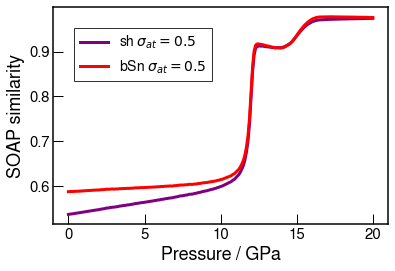

In [134]:
fig, axs = plt.subplots()
axs.plot(df['f_PressAve']/1e4, df['sh0.50'], color='Purple', label='sh $\sigma_{at}=0.5$')
axs.plot(df['f_PressAve']/1e4, df['bSn0.50'], color='Red', label='bSn $\sigma_{at}=0.5$')
axs.set(ylabel='SOAP similarity', xlabel='Pressure / GPa')
axs.set(xlabel='Pressure / GPa')
axs.legend()

[[0.1, 0.2, 0.3, 0.4, 0.5], [0.1, 0.2, 0.3, 0.4, 0.5]]


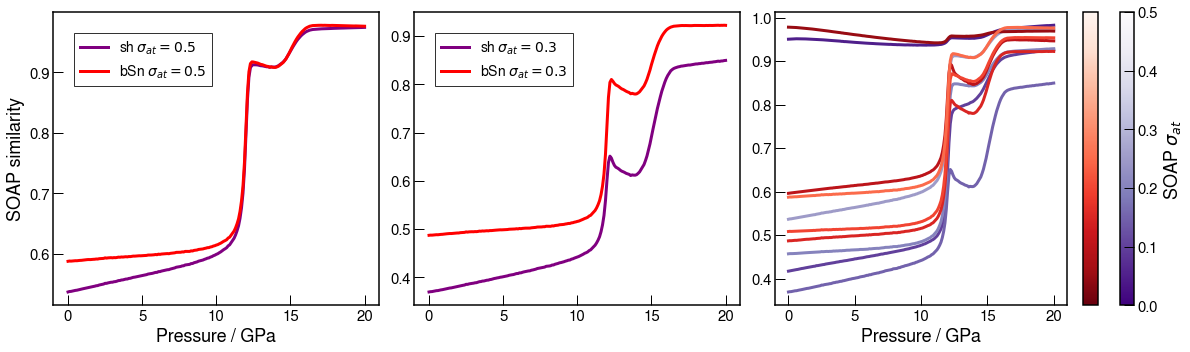

In [138]:
labels = [sh_labels[:5], bSn_labels[:5]]
cmaps = [plt.cm.Purples_r, plt.cm.Reds_r]
sigma_range = [[float(re.findall("\d+\.\d+", i)[0]) for i in j] for j in labels]
print(sigma_range)
sm = [plt.cm.ScalarMappable(cmap=cmaps[0], norm=plt.Normalize(vmin=0, vmax=max(flatten(sigma_range)))),
    plt.cm.ScalarMappable(cmap=cmaps[1], norm=plt.Normalize(vmin=0, vmax=max(flatten(sigma_range))))]

cols = 4
rows = int(np.ceil(len(labels)/cols))

fig, ax = plt.subplots(1,3, figsize=(15/0.9,5), gridspec_kw={'width_ratios': [1, 1, 1/0.9]})
for j in range(len(labels)):
    
    for ct, i in enumerate(labels[j]):
        col = cmaps[j](sigma_range[j])
        ax[2].plot(df['f_PressAve']/1e4, df[i], c=col[ct])
                 #, label=i[4:])
        #ax[1].set(xlabel=labels[j][0].split('.')[0][:-1])
ax[0].plot(df['f_PressAve']/1e4, df['sh0.50'], color='Purple', label='sh $\sigma_{at}=0.5$')
ax[0].plot(df['f_PressAve']/1e4, df['bSn0.50'], color='Red', label='bSn $\sigma_{at}=0.5$')
ax[1].plot(df['f_PressAve']/1e4, df['sh0.30'], color='Purple', label='sh $\sigma_{at}=0.3$')
ax[1].plot(df['f_PressAve']/1e4, df['bSn0.30'], color='Red', label='bSn $\sigma_{at}=0.3$')
ax[0].legend(); ax[1].legend()
plt.colorbar(sm[0], fraction=0.05, label='SOAP $\sigma_{at}$')
plt.colorbar(sm[1], fraction=0.05/0.9, ticks=[])
ax[0].set(ylabel='SOAP similarity', xlabel='Pressure / GPa')
ax[2].set(xlabel='Pressure / GPa')
fig.tight_layout()


# Cutoff

In [178]:
with open('VLDNat_sig_cut.json', 'r') as f:
    vld100k_sig_cut = pd.read_json(f)

In [180]:
vld100k_sig_cut.head()

,Origin,cutoff,nneightol,f_PressAve,Press,fcc_0.10_2.85,dia_0.10_2.85,hcp_0.10_2.85,bcc_0.10_2.85,sc_0.10_2.85,...,Cmca_1.00_4.00,fcc_fix_B_1.00_4.00,dia_fix_B_1.00_4.00,hcp_fix_B_1.00_4.00,bcc_fix_B_1.00_4.00,sc_fix_B_1.00_4.00,sh_fix_B_1.00_4.00,bSn_fix_B_1.00_4.00,Imma_fix_B_1.00_4.00,Cmca_fix_B_1.00_4.00
0,"[1.84638662, 1.84638662, 1.84638662]",5,1.2,0,0,0.985168,0.998383,0.985220,0.984754,0.998154,...,0.798152,0.757954,0.936051,0.769693,0.691319,0.775250,0.818746,0.774563,0.799495,0.793566
1,"[1.87775792, 1.87775792, 1.87775792]",5,1.2,1000,1000,0.985040,0.998371,0.985086,0.984591,0.998141,...,0.799389,0.759093,0.935249,0.770798,0.692610,0.776552,0.819911,0.775822,0.800704,0.794689
2,"[1.8984241800000001, 1.8984241800000001, 1.898...",5,1.2,2000,2000,0.984991,0.998332,0.985030,0.984507,0.998152,...,0.800072,0.759661,0.934827,0.771348,0.693260,0.777223,0.820504,0.776463,0.801319,0.795252
3,"[1.9404907200000001, 1.9404907200000001, 1.940...",5,1.2,3000,3000,0.984817,0.998334,0.984850,0.984298,0.998124,...,0.801186,0.760670,0.934073,0.772326,0.694418,0.778417,0.821560,0.777603,0.802415,0.796255
4,"[1.96282952, 1.96282952, 1.96282952]",5,1.2,4000,4000,0.984743,0.998304,0.984770,0.984189,0.998127,...,0.802017,0.761393,0.933527,0.773025,0.695249,0.779274,0.822317,0.778422,0.803200,0.796972


In [198]:
sig_cut_labels = [[i for i in vld100k_sig_cut.columns if j in i and 'fix' not in i][1:-1] for j in xtals]

[Text(0, 0.5, 'SOAP similarity')]

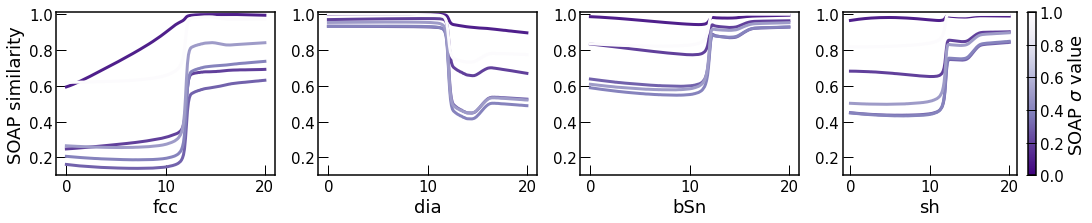

In [215]:
df = vld100k_sig_cut

sigma_range = [[float(re.findall("\d+\.\d+", i)[0]) for i in j] for j in sig_cut_labels]
cut_range = [[float(re.findall("\d+\.\d+", i)[1]) for i in j] for j in sig_cut_labels]
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=max(flatten(sigma_range))))
cm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=max(flatten(cut_range))))

cols = 4
rows = int(np.ceil(len(labels)/cols))

fig, ax = plt.subplots(rows,cols, figsize=(4.5*cols,3*rows))
for j in range(len(sig_cut_labels)):
    col = cmap(sigma_range[j])
    for ct, i in enumerate(sig_cut_labels[j]):
        if cut_range[j][ct] == 3.5:
            ax[j].plot(df['f_PressAve']/1e4, df[i], c=col[ct])
                     #, label=i[4:])
            ax[j].set(xlabel=labels[j][0].split('.')[0][:-1])
    ax[j].set(ylim=(0.1, 1.01))
plt.colorbar(sm, label='SOAP $\sigma$ value')
ax[0].set(ylabel='SOAP similarity')

In [217]:
[i[0] for i in sig_cut_labels]

['fcc_0.20_2.85', 'dia_0.20_2.85', 'bSn_0.20_2.85', 'sh_0.20_2.85']

In [220]:
sigma_range[2]

[0.2,
 0.3,
 0.4,
 0.5,
 1.0,
 0.1,
 0.2,
 0.3,
 0.4,
 0.5,
 1.0,
 0.1,
 0.2,
 0.3,
 0.4,
 0.5,
 1.0,
 0.1,
 0.2,
 0.3,
 0.4,
 0.5]

In [228]:
labels

[['bSn_0.20_2.85',
  'bSn_0.30_2.85',
  'bSn_0.40_2.85',
  'bSn_0.50_2.85',
  'bSn_1.00_2.85'],
 ['sh_0.20_2.85',
  'sh_0.30_2.85',
  'sh_0.40_2.85',
  'sh_0.50_2.85',
  'sh_1.00_2.85']]

In [238]:
labels

[['bSn_0.20_2.85',
  'bSn_0.30_2.85',
  'bSn_0.40_2.85',
  'bSn_0.50_2.85',
  'bSn_1.00_2.85',
  'bSn_0.10_3.00',
  'bSn_0.20_3.00',
  'bSn_0.30_3.00',
  'bSn_0.40_3.00',
  'bSn_0.50_3.00',
  'bSn_1.00_3.00',
  'bSn_0.10_3.50',
  'bSn_0.20_3.50',
  'bSn_0.30_3.50',
  'bSn_0.40_3.50',
  'bSn_0.50_3.50',
  'bSn_1.00_3.50',
  'bSn_0.10_4.00',
  'bSn_0.20_4.00',
  'bSn_0.30_4.00',
  'bSn_0.40_4.00',
  'bSn_0.50_4.00'],
 ['sh_0.20_2.85',
  'sh_0.30_2.85',
  'sh_0.40_2.85',
  'sh_0.50_2.85',
  'sh_1.00_2.85',
  'sh_0.10_3.00',
  'sh_0.20_3.00',
  'sh_0.30_3.00',
  'sh_0.40_3.00',
  'sh_0.50_3.00',
  'sh_1.00_3.00',
  'sh_0.10_3.50',
  'sh_0.20_3.50',
  'sh_0.30_3.50',
  'sh_0.40_3.50',
  'sh_0.50_3.50',
  'sh_1.00_3.50',
  'sh_0.10_4.00',
  'sh_0.20_4.00',
  'sh_0.30_4.00',
  'sh_0.40_4.00',
  'sh_0.50_4.00']]

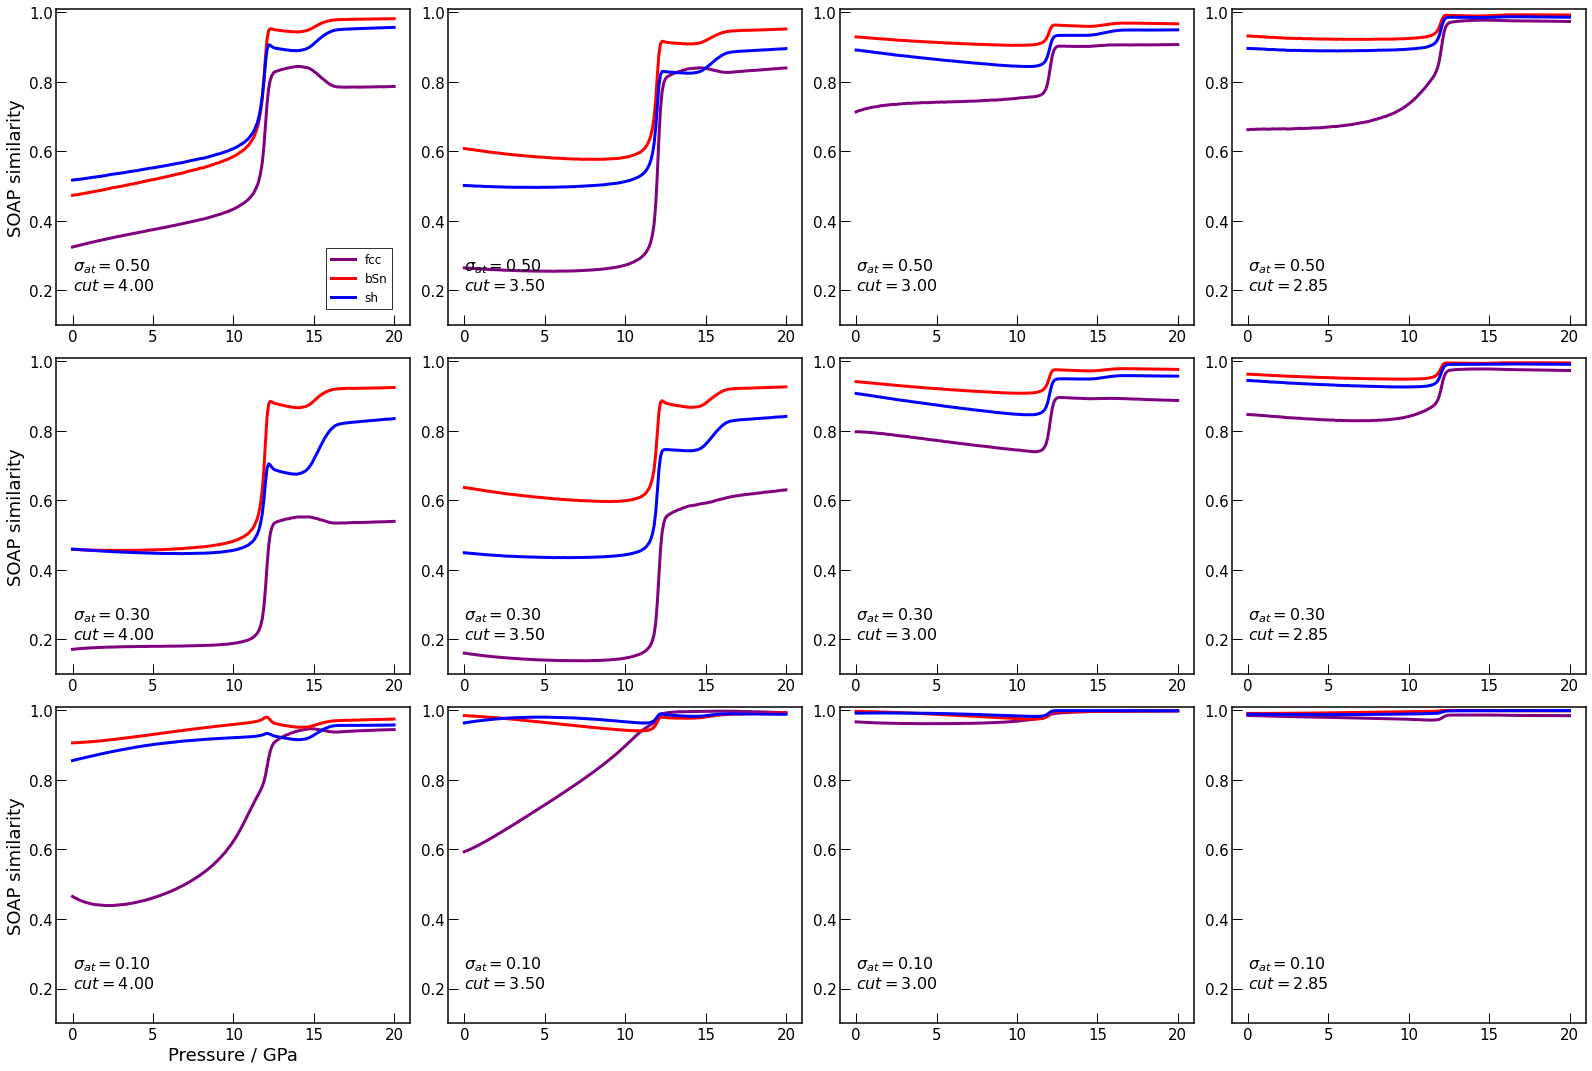

In [300]:
df = vld100k_sig_cut
ch = [0, 2,3] # sh and bSn
cuts = ['4.00', '3.50', '3.00', '2.85']
sigs = [['0.50']*len(cuts), ['0.30']*len(cuts), ['0.10']*len(cuts)]
colors = ['Purple', 'Red', 'Blue']


labels = [sig_cut_labels[i] for i in ch] 
cmaps = [plt.cm.Purples_r, plt.cm.Reds_r, plt.cm.Blues_r]
sm = [plt.cm.ScalarMappable(cmap=cmaps[i],
                            norm=plt.Normalize(vmin=0,vmax=max(flatten([sigma_range[val] for val in ch]))))
    for i, val in enumerate(ch)]

cols = 4
rows = int(np.ceil(len(labels)/cols))

fig, ax = plt.subplots(len(sigs),len(cuts), figsize=(5*(len(cuts))/0.9,5*len(sigs)),
                       gridspec_kw={'width_ratios': [1 for i in range(len(cuts))]})# + [1/0.9]})
# for j in range(len(labels)):
    
#     for ct, i in enumerate(labels[j]):
#         col = cmaps[j](sigma_range[j])
#         if cut_range[ch[j]][ct] == 3.5:
#             ax[-1].plot(df['f_PressAve']/1e4, df[i], c=col[ct])
                 #, label=i[4:])
        #ax[1].set(xlabel=labels[j][0].split('.')[0][:-1])

for s in range(len(sigs)):
    for i in range(len(cuts)):
        ls = []
        for k in range(len(labels)):
            lin, = ax[s][i].plot(df['f_PressAve']/1e4,
                                        df['{}_{}_{}'.format(l := labels[k][0].split('_')[0], sigs[s][i], cuts[i])],
                                        color=colors[k], label='{}'.format(l))
            ls.append(lin)
    #         ax[s][i].legend()
        ax[s][i].text(0,0.2, '$\sigma_{{at}}={}$\n$cut={}$'.format(sigs[s][i], cuts[i]), fontsize=16)
        ax[s][i].set(ylim=(0.1,1.01))
    
    
# plt.colorbar(sm[0], fraction=0.05, label='SOAP $\sigma_{at}$')
# plt.colorbar(sm[1], fraction=0.05/0.9, ticks=[])
    ax[s][0].set(ylabel='SOAP similarity')
ax[-1][0].set(xlabel='Pressure / GPa')
ax[0][0].legend(ls, [i[0].split('_')[0] for i in labels], bbox_to_anchor=(1,0.3))
fig.tight_layout()


# SOAP distribution/spread analysis

In [142]:
with open('VLDNat_sig_finalframe.xyz', 'r') as f:
    vld100k_sig_ff = list(read_xyz(f))[0]

In [150]:
sh_03 = vld100k_sig_ff.arrays['sh0.30']
bSn_03 = vld100k_sig_ff.arrays['bSn0.30']

In [157]:
sh_sel = sh_03[sh_03 > 0.8]
bSn_sel = bSn_03[sh_03 > 0.8]

In [158]:
sh_sel.mean(), bSn_sel.mean()

(0.9528534503532788, 0.9488344593740575)

In [160]:
sh_03.std(), bSn_03.std()

(0.09643011924566482, 0.06476073795299463)

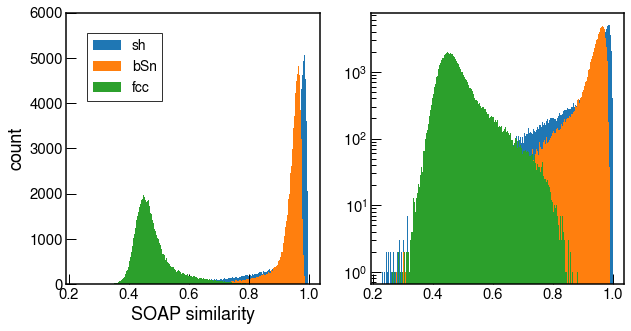

In [176]:
fig, (axs, axs2) = plt.subplots(1,2, figsize=(10,5))

axs.hist(vld100k_sig_ff.arrays['sh0.30'], bins=300, label='sh', zorder=0.5)
axs.hist(vld100k_sig_ff.arrays['bSn0.30'], bins=300, label='bSn', zorder=1)
axs.hist(vld100k_sig_ff.arrays['fcc0.30'], bins=300, label='fcc', zorder=2)
# axs.hist(np.sqrt(PQ1k_rand_16.arrays['sh0.3'])*1000, bins=300, label='u16_1krand')

axs2.hist(vld100k_sig_ff.arrays['sh0.30'], bins=300, label='GAP18', zorder=0.5)
axs2.hist(vld100k_sig_ff.arrays['bSn0.30'], bins=300, label='GAP18', zorder=1)
axs2.hist(vld100k_sig_ff.arrays['fcc0.30'], bins=300, label='GAP18', zorder=2)
# axs2.hist(np.sqrt(PQ1k_rand_16.arrays['sh0.3'])*1000, bins=300, label='u16_1krand')
axs2.set_yscale('log')
axs.set(ylim=(0,6000), xlabel='SOAP similarity', ylabel='count')
# axs2.set(ylim=(0,4000))
axs.legend()

In [164]:
vld100k_sig_ff.arrays.keys()

dict_keys(['numbers', 'positions', 'map_shift', 'n_neighb', 'local_energy', 'fcc0.01', 'dia0.01', 'hcp0.01', 'bcc0.01', 'sc0.01', 'sh0.01', 'bSn0.01', 'Imma0.01', 'Cmca0.01', 'fcc0.10', 'dia0.10', 'hcp0.10', 'bcc0.10', 'sc0.10', 'sh0.10', 'bSn0.10', 'Imma0.10', 'Cmca0.10', 'fcc0.20', 'dia0.20', 'hcp0.20', 'bcc0.20', 'sc0.20', 'sh0.20', 'bSn0.20', 'Imma0.20', 'Cmca0.20', 'fcc0.30', 'dia0.30', 'hcp0.30', 'bcc0.30', 'sc0.30', 'sh0.30', 'bSn0.30', 'Imma0.30', 'Cmca0.30', 'fcc0.40', 'dia0.40', 'hcp0.40', 'bcc0.40', 'sc0.40', 'sh0.40', 'bSn0.40', 'Imma0.40', 'Cmca0.40', 'fcc0.50', 'dia0.50', 'hcp0.50', 'bcc0.50', 'sc0.50', 'sh0.50', 'bSn0.50', 'Imma0.50', 'Cmca0.50', 'fcc0.60', 'dia0.60', 'hcp0.60', 'bcc0.60', 'sc0.60', 'sh0.60', 'bSn0.60', 'Imma0.60', 'Cmca0.60', 'fcc0.70', 'dia0.70', 'hcp0.70', 'bcc0.70', 'sc0.70', 'sh0.70', 'bSn0.70', 'Imma0.70', 'Cmca0.70', 'fcc0.80', 'dia0.80', 'hcp0.80', 'bcc0.80', 'sc0.80', 'sh0.80', 'bSn0.80', 'Imma0.80', 'Cmca0.80', 'fcc0.90', 'dia0.90', 'hcp0.90', 

In [ ]:
cols = 4
rows = int(np.ceil(len(rs)/cols))
fig, ax = plt.subplots(rows,cols, figsize=(4.5*cols,3*rows))
axs = ax.flatten()[:-1]
for j, val in enumerate(rs):                    
    for i in comp_labels:
        axs[j].plot(val.df['f_PressAve']/1e4, val.df[i], label=i)
        axs[j].set(xlim=(-0.1,20.1), ylim=(0.2,1.0))
        if j >= cols * (rows - 1):
            axs[j].set(xlabel='P / GPa') 
        if j % cols == 0:
            axs[j].set(ylabel='SOAP similarity') 
    if j < 4:
        axs[j].text(1.2, 1.02, val.label[4:-16], fontsize=10)
    else:
        axs[j].text(1.2, 1.02, val.label, fontsize=10)
axs[-1].legend(bbox_to_anchor=(1.0,0.0))a